<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:10px 30px;margin:20; padding:10px;"> CIFAR-10 Classification </p>


<div style="border-radius:10px; padding: 15px; background-color: #c9ff00; font-size:115%; text-align:left">
<h3 align="left"><font color=#4c5454> About CIFAR-10 </font></h3>
    
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The classes include objects like cars, birds, cats, dogs, etc. There are 50,000 training images and 10,000 test images.

<div style="border-radius:10px; padding: 15px; background-color: #c9ff00; font-size:115%; text-align:left">
<h3 align="left"><font color=#4c5454> Outlines </font></h3>

    
We wanna do classification on the CIFAR-10 dataset by using different algorithms, such as:
- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (K-NN)
- Naive Bayes
- Gradient Boosting Machines (GBM)
- Neural Networks (NN)
- AdaBoost
- Quadratic Discriminant Analysis (QDA)
- Linear Discriminant Analysis (LDA)
- XGBoost
- LightGBM
- CatBoost

Given the complexity of the CIFAR-10 dataset and the variety of algorithms it is better that we perform some preprocessing to adapt the data to certain models. For example, for some algorithms we will require flattening the images, whereas some other models such as deep learning models we will work with the original shape.
    
Finally We will ll calculate six important classification metrics for each model:
    
- Accuracy: Measures the proportion of correct predictions over the total number of instances.
- Precision: Measures the proportion of true positives among the predicted positives (per class in multiclass).
- Recall: Measures the proportion of true positives among the actual positives (per class in multiclass).
- F1 Score: Harmonic mean of precision and recall, gives a balanced view.
- ROC AUC: Compares the true positive rate vs. false positive rate across different thresholds (multiclass may use One-vs-One or One-vs-Rest strategies).
- Confusion Matrix: Shows the actual vs. predicted classes, helps to identify where the model is making mistakes.

<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:15px 50px; margin:0; padding:10px;"> Import & Load CIFAR-10 Dataset </p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import cifar10
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:15px 50px; margin:0; padding:10px;">  Select Two Classes and a Subset of 500 Samples </p>

In [ ]:
# We'll select two classes (e.g., class 0 and class 1) and take 250 samples from each
import numpy as np

# Select two classes
class_0_idx = np.where(y_train == 0)[0][:250]
class_1_idx = np.where(y_train == 1)[0][:250]

# Concatenate the indices and select the samples
selected_idx = np.concatenate((class_0_idx, class_1_idx))
X_subset = X_train[selected_idx]
y_subset = y_train[selected_idx]

<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:15px 50px; margin:0; padding:10px;">  Flatten and Normalize the Data </p>


In [ ]:
# Some algorithms such as traditional machine learning algorithms will require the images to be flattened.
# Flatten the images
X_subset_flat = X_subset.reshape(X_subset.shape[0], -1)

# Normalize the pixel values
X_subset_flat = X_subset_flat.astype('float32') / 255.0

<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:15px 50px; margin:0; padding:10px;"> Split the Data into Training and Test Sets </p>

In [ ]:
# Now you have a subset of the CIFAR-10 dataset containing 500 images from two classes, suitable for binary classification. You can use this subset with the models and loops described earlier, and the training process should be much faster.
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset_flat, y_subset, test_size=0.2, random_state=42)


<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:5px 50px; margin:0; padding:10px;">Visualize Dataset </p>


<div style="border-radius:10px; padding: 15px; background-color: #c9ff00; font-size:115%; text-align:left">
It's often a good idea to visualize some examples of the data to understand what you're working with.


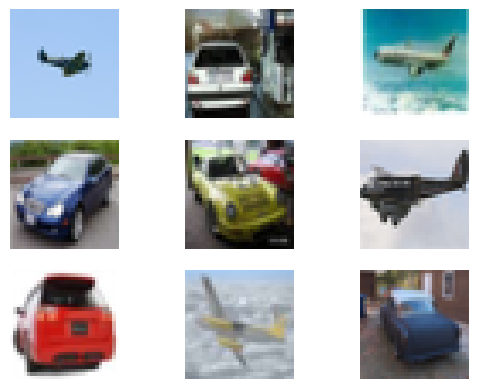

In [ ]:
import matplotlib.pyplot as plt
rows = 3  # Define the number of rows and columns for the grid
cols = 3
for i in range(rows * cols): # Display the first few images
    plt.subplot(rows, cols, i + 1)  # +1 because subplot indexing starts from 1
    image = X_train_subset[i].reshape(32, 32, 3) # Reshape the flattened image into 32x32x3 shape
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis for a cleaner display
plt.show()

<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:15px 50px;  margin:0; padding:10px;">Load Important Libraries </p>


In [ ]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

<a id="read"></a>
# <p style="background-color:#c9ff00; font-family:calibri; color:#4c5454; font-size:100%; text-align:center; border-radius:15px 50px;  margin:0; padding:10px;">Apply Classification Models </p>


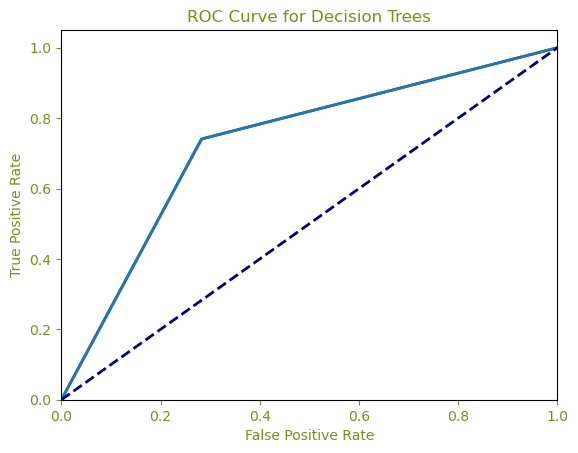

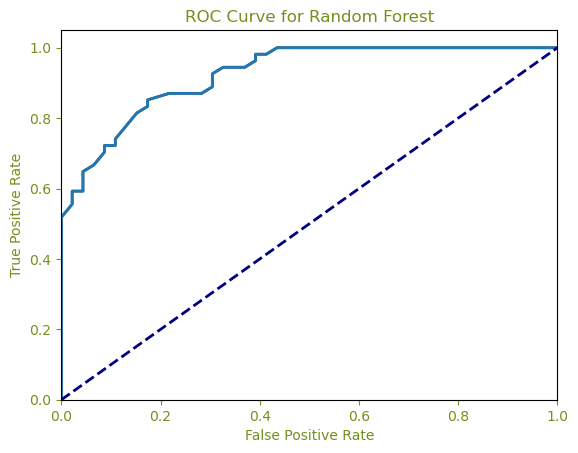

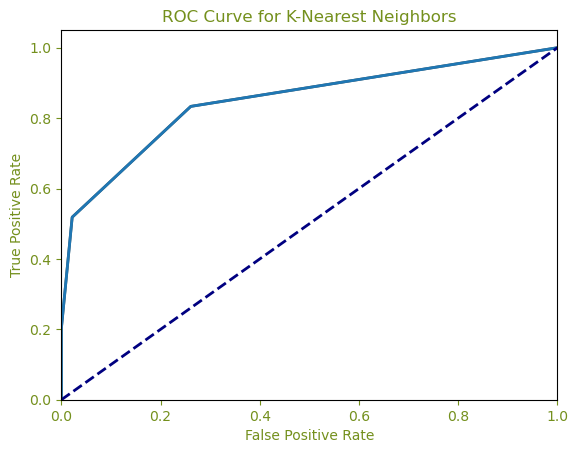

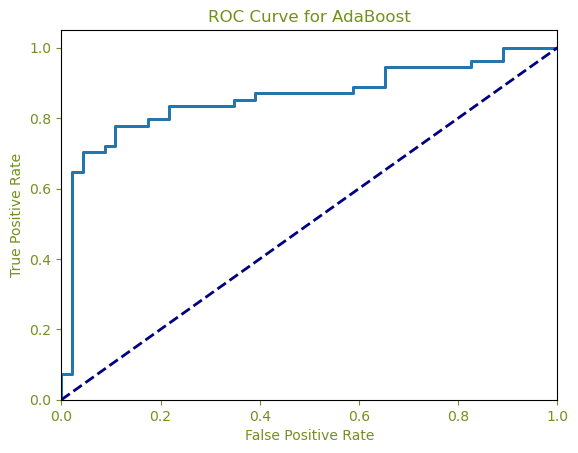

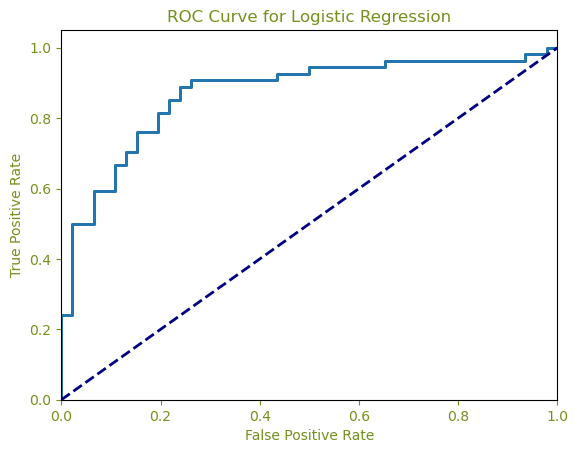

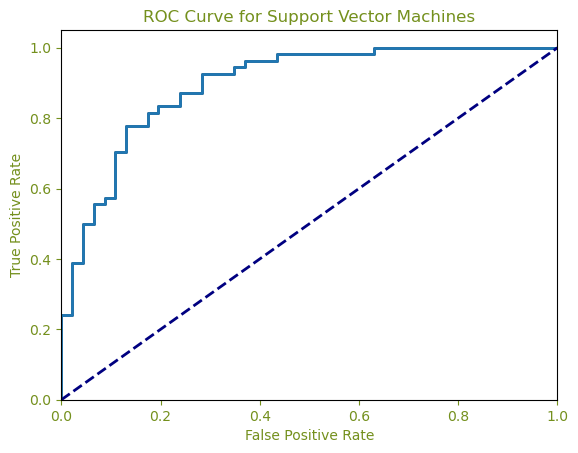

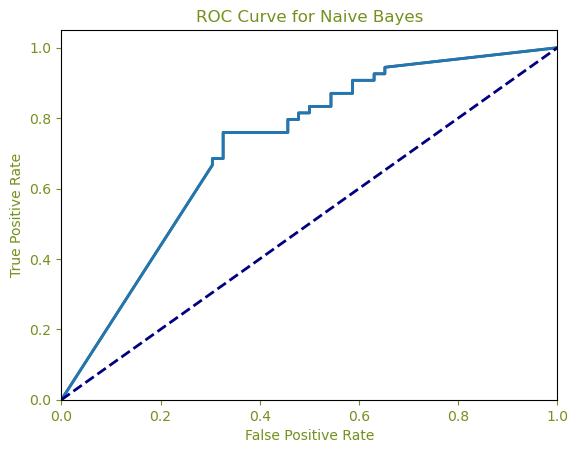

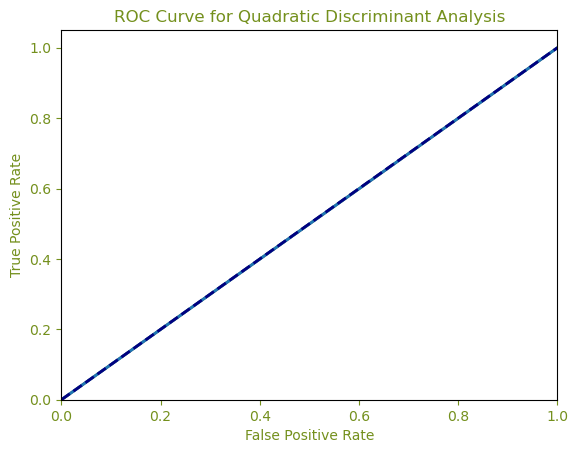

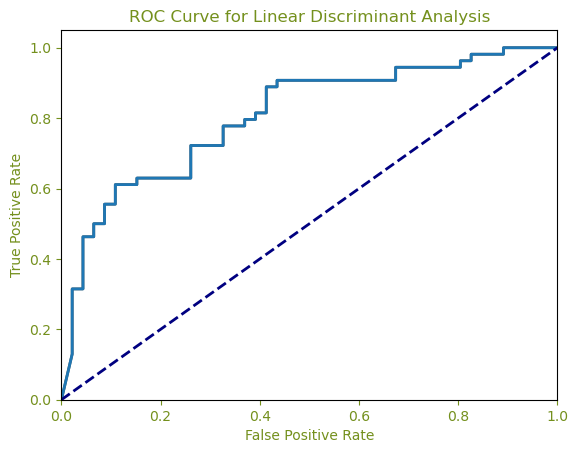

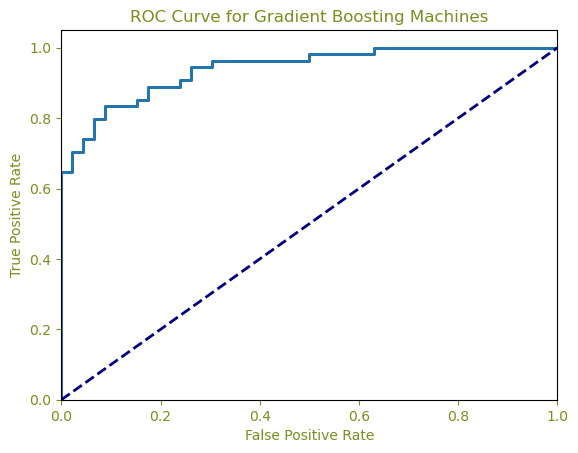

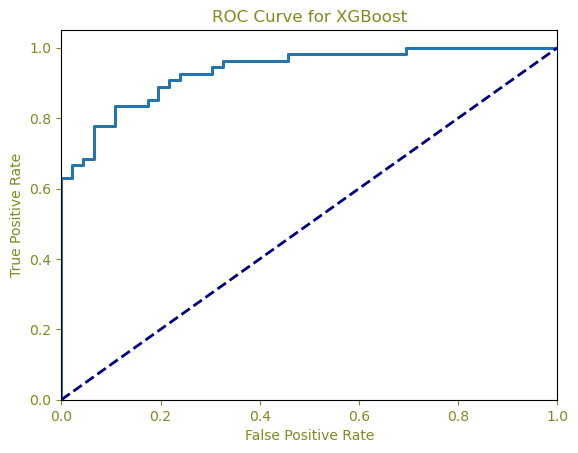

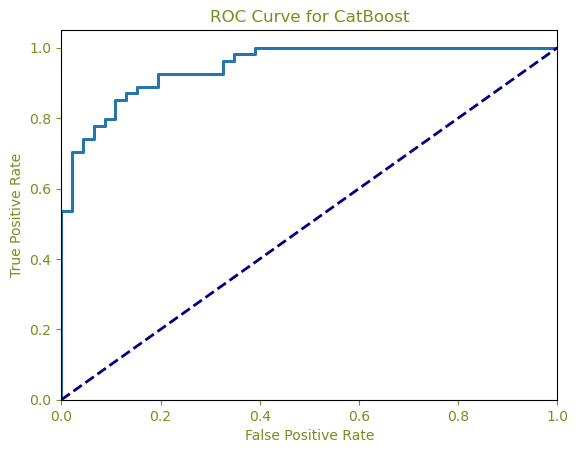

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Trees,0.730000,0.728422,0.729066,0.728670,0.729066
1,Random Forest,0.830000,0.828784,0.829710,0.829163,0.924718
2,K-Nearest Neighbors,0.570000,0.758427,0.601852,0.509972,0.847021
3,AdaBoost,0.810000,0.810924,0.812802,0.809829,0.857085
4,Logistic Regression,0.810000,0.808711,0.809581,0.809064,0.869565
5,Support Vector Machines,0.810000,0.810486,0.806361,0.807673,0.895330
6,Naive Bayes,0.690000,0.689276,0.690419,0.689223,0.722222
7,Quadratic Discriminant Analysis,0.510000,0.499571,0.499597,0.495418,0.499597
8,Linear Discriminant Analysis,0.710000,0.708081,0.707327,0.707632,0.805354
9,Gradient Boosting Machines,0.860000,0.862179,0.863929,0.859944,0.940419


In [ ]:
import pandas as pd
models = [
    ("Decision Trees", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Support Vector Machines", SVC(probability=True)),
    ("Naive Bayes", GaussianNB()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Gradient Boosting Machines", GradientBoostingClassifier()),
    ("XGBoost", xgb.XGBClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0)) # verbose=0 to suppress training output
]

# Dictionary to store the results
results_dict = { "Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "ROC AUC": []}

for name, model in models:
    # Train the model
    model.fit(X_train_subset, y_train_subset)

    # Predict on the test set
    y_pred = model.predict(X_test_subset)
    y_pred_proba = model.predict_proba(X_test_subset) if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test_subset, y_pred)
    precision = precision_score(y_test_subset, y_pred, average='macro')
    recall = recall_score(y_test_subset, y_pred, average='macro')
    f1 = f1_score(y_test_subset, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test_subset, y_pred_proba[:, 1]) if y_pred_proba is not None else "Not Applicable"

    # Save results to dictionary
    results_dict["Model"].append(name)
    results_dict["Accuracy"].append(accuracy)
    results_dict["Precision"].append(precision)
    results_dict["Recall"].append(recall)
    results_dict["F1 Score"].append(f1)
    results_dict["ROC AUC"].append(roc_auc)

    # Plot ROC curve if probabilities are available
    if y_pred_proba is not None:
        # Extract the probabilities for the positive class
        positive_class_probabilities = y_pred_proba[:, 1]
        # Compute the ROC curve
        fpr, tpr, _ = roc_curve(y_test_subset.ravel(), positive_class_probabilities)
        # Plot the ROC curve with the specified color
        plt.plot(fpr, tpr, lw=2, color='#4c5454')
        # Plot the ROC curve
        plt.plot(fpr, tpr, lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', color='#74901d')
        plt.ylabel('True Positive Rate', color='#74901d')
        plt.title(f'ROC Curve for {name}', color='#74901d')
        # Set the color of the tick labels
        plt.tick_params(colors='#74901d')
        plt.show()  # Show the plot

# Convert results to DataFrame
results_df = pd.DataFrame(results_dict)
# Define a custom style for each column
styles = [
    {'selector': f'th:nth-child({i + 1}), td:nth-child({i + 1})',
     'props': [('background-color', f'hsl({i * 45}, 100%, 80%)'),
               ('font-weight', 'bold'),
               ('color', 'grey'),
               ('text-align', 'center')]} # Align text to center
    for i in range(len(results_df.columns))
]

# Apply the styles
styled_results = results_df.style.set_table_styles(styles)
styled_results

# <div style="border-radius:10px; padding: 15px; background-color: #c9ff00; font-size:115%; text-align:left">
<h3 align="left"><font color=#4c5454>Results of Models Classification:</font></h3>
    
- The F1 Score considers both precision and recall, and a higher value generally indicates a better balance between these two metrics.
    
- ROC AUC (Receiver Operating Characteristic Area Under the Curve) is another valuable metric that measures a model's ability to distinguish between classes. A higher ROC AUC value indicates better performance.
    
Based on the F1 Score and ROC AUC values from the provided results, we can determine the best model for classification was:
- Model: CatBoost
- F1 Score: 0.859776
- ROC AUC: 0.946457

and the worse model was:
- Model: Quadratic Discriminant Analysis
- F1 Score: 0.495418
- ROC AUC: 0.499597

In this case, CatBoost have the highest F1 Score, making them the best-performing models based on this metric. Becasue, XGBoost is an ensemble learning method that builds multiple decision trees and combines their predictions. It has the ability to model complex nonlinear relationships between features and the target variable. Moreover, XGBoost incorporates regularization terms to prevent overfitting and can handle a wide range of data patterns. It can adapt to the complexity of the data and make accurate predictions. Additionally, it is robust to different scales and distributions of features.
    
Quadratic Discriminant Analysis has the lowest F1 Score, indicating the worst performance; becasue, Quadratic Discriminant Analysis makes the assumption that the features follow a multivariate Gaussian distribution within each class, and it models the data using a quadratic decision boundary. This assumption may not hold true for all datasets, particularly if the data is not normally distributed or if the relationship between features and the target variable is highly nonlinear.Moreover, If the data doesn't meet the assumptions of QDA (such as multivariate normality), the model may either overfit to noise or underfit by failing to capture the underlying patterns. Additionally, it is Highly sensitive to the scaling and distribution of the features. Proper preprocessing, such as scaling and transformation, might be necessary for QDA to perform well.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

for name, model in models:
    # Train the model
    model.fit(X_train_subset, y_train_subset)

    # Predict on the test set
    y_pred = model.predict(X_test_subset)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_subset, y_pred)

    # Print confusion matrix
    print(f"Confusion Matrix for {name}:\n")
    print(cm)
    print("\n")

    # Calculate classification report
    cr = classification_report(y_test_subset, y_pred)

    # Print classification report
    print(f"Classification Report for {name}:\n")
    print(cr)
    print("\n")


Confusion Matrix for Decision Trees:

[[35 11]
 [14 40]]


Classification Report for Decision Trees:

              precision    recall  f1-score   support

           0       0.71      0.76      0.74        46
           1       0.78      0.74      0.76        54

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



Confusion Matrix for Random Forest:

[[37  9]
 [ 8 46]]


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.84      0.85      0.84        54

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



Confusion Matrix for K-Nearest Neighbors:

[[46  0]
 [43 11]]


Classification Report for K-Nearest Neighbors:

              precision    r